In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import roc_curve
from sklearn.preprocessing import LabelEncoder

from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score,confusion_matrix

#from imblearn.combine import SMOTETomek

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [2]:
df = pd.read_csv('dataset.csv')
df.shape

(45211, 11)

In [3]:
df.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,no
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,no


In [4]:
df.dtypes

age                int64
job               object
marital           object
education_qual    object
call_type         object
day                int64
mon               object
dur                int64
num_calls          int64
prev_outcome      object
y                 object
dtype: object

In [5]:
df.duplicated().sum()

6

In [6]:
df.drop_duplicates()        #duplicated values dropped
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             45211 non-null  int64 
 1   job             45211 non-null  object
 2   marital         45211 non-null  object
 3   education_qual  45211 non-null  object
 4   call_type       45211 non-null  object
 5   day             45211 non-null  int64 
 6   mon             45211 non-null  object
 7   dur             45211 non-null  int64 
 8   num_calls       45211 non-null  int64 
 9   prev_outcome    45211 non-null  object
 10  y               45211 non-null  object
dtypes: int64(4), object(7)
memory usage: 3.8+ MB


In [7]:
df.describe()

,age,day,dur,num_calls
count,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,15.806419,258.163080,2.763841
std,10.618762,8.322476,257.527812,3.098021
min,18.000000,1.000000,0.000000,1.000000
25%,33.000000,8.000000,103.000000,1.000000
50%,39.000000,16.000000,180.000000,2.000000
75%,48.000000,21.000000,319.000000,3.000000
max,95.000000,31.000000,4918.000000,63.000000


In [8]:
df["y"].value_counts()

y
no     39922
yes     5289
Name: count, dtype: int64

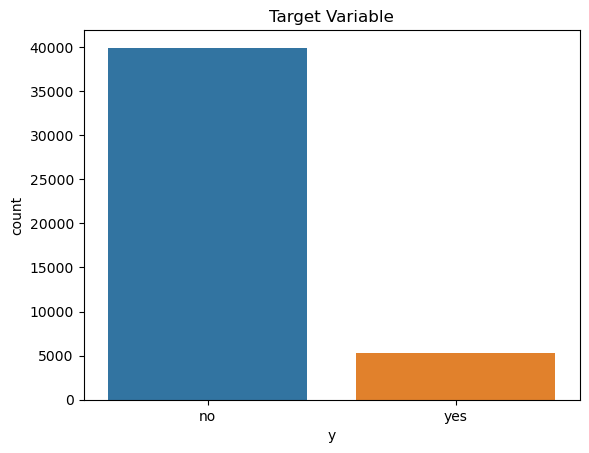

In [9]:
sns.countplot(x="y", data=df)
plt.title("Target Variable")
plt.show()

In [10]:
print("percentage of NO and YES\n",df["y"].value_counts()/len(df)*100)

percentage of NO and YES
 y
no     88.30152
yes    11.69848
Name: count, dtype: float64


Index(['job', 'marital', 'education_qual', 'call_type', 'mon', 'prev_outcome',
       'y'],
      dtype='object')


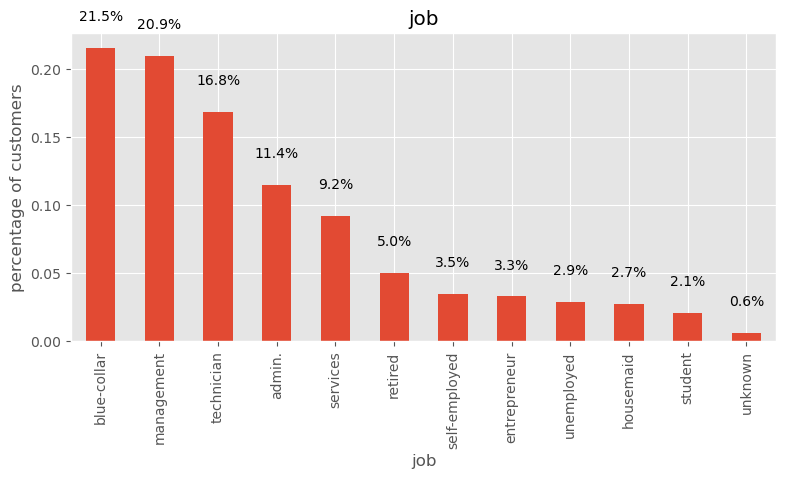

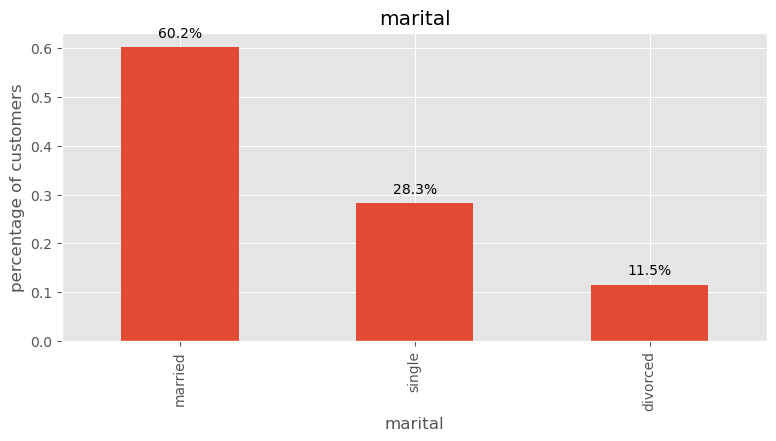

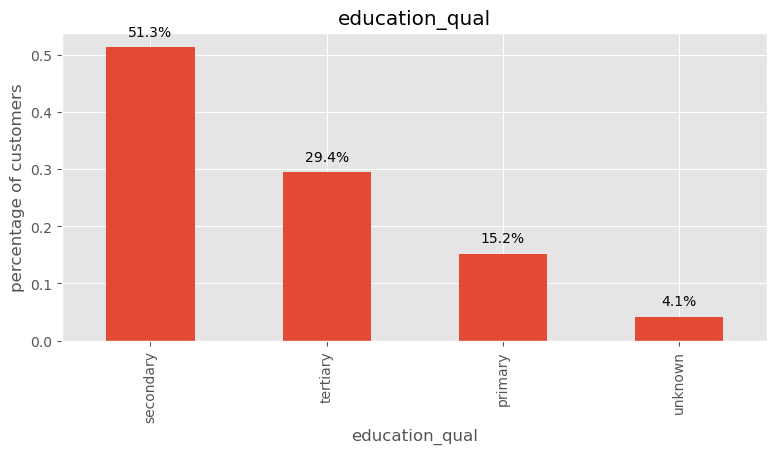

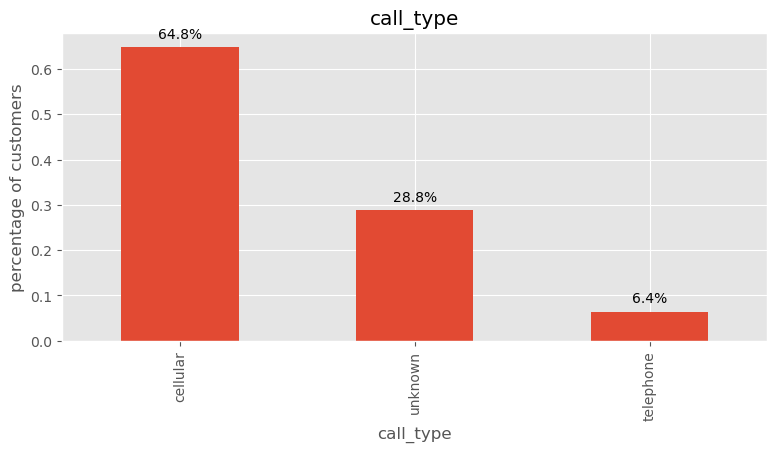

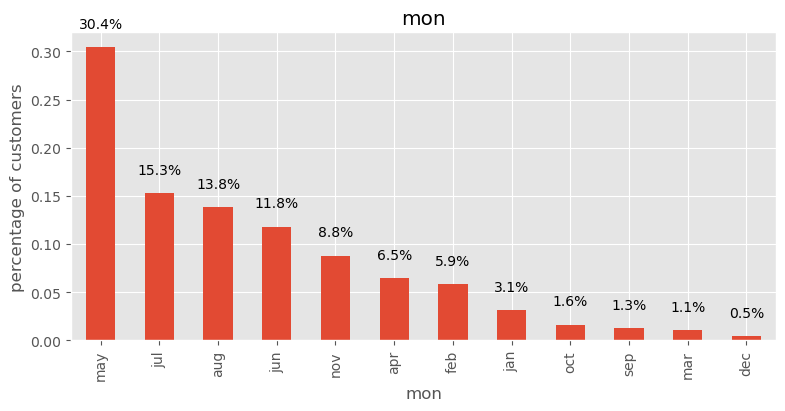

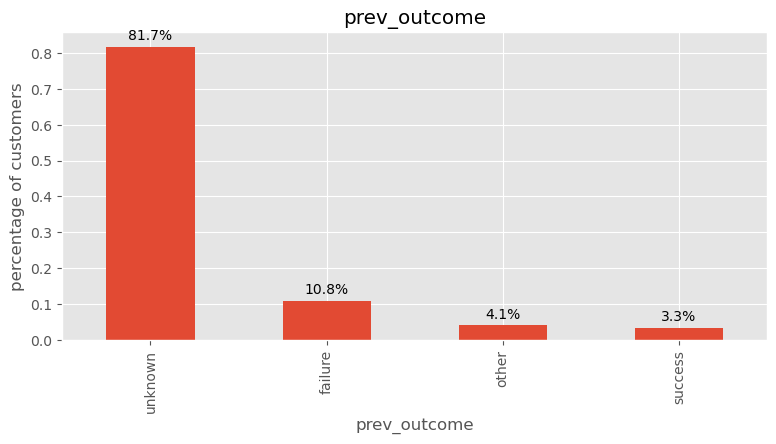

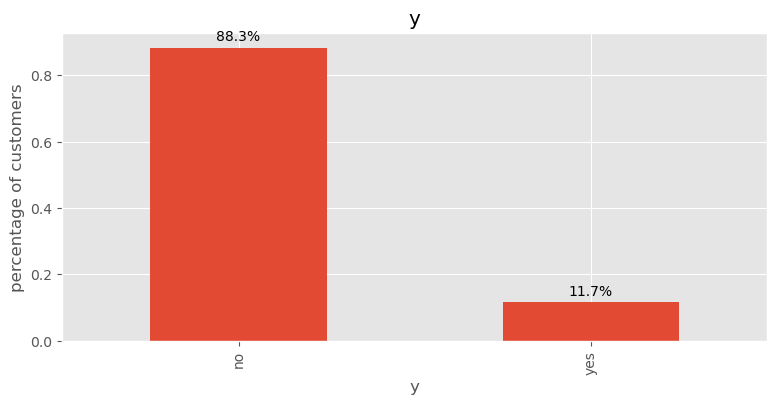

In [11]:
# indentifying the categorical variables
cat_var= df.select_dtypes(include= ["object"]).columns
print(cat_var)

# plotting bar chart for each categorical variable
plt.style.use("ggplot")

for column in cat_var:
    plt.figure(figsize=(20,4))
    ax = plt.subplot(121)
    df[column].value_counts(normalize=True).plot(kind="bar")
    plt.xlabel(column)
    plt.ylabel("percentage of customers")
    plt.title(column)
    
    # Add percentage labels to the top of each bar
    for p in ax.patches:
        ax.text(p.get_x()+p.get_width()/2., p.get_height()+0.02, f"{p.get_height()*100:.1f}%", ha="center")

In [12]:
cate_var=['job','education_qual']
for column in cate_var:
    mode= df[column].mode()[0]
    df[column]= df[column].replace("unknown", mode)

In [13]:
# indentifying the numerical variables
num_var= df.select_dtypes(include=np.number)
num_var.head()

,age,day,dur,num_calls
0,58,5,261,1
1,44,5,151,1
2,33,5,76,1
3,47,5,92,1
4,33,5,198,1


C:\Users\SAI TARUN\AppData\Local\Temp\ipykernel_10940\3302417876.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column], kde=True)
C:\Users\SAI TARUN\AppData\Local\Temp\ipykernel_10940\3302417876.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column], kde=True)
C:\Users\SAI TARUN

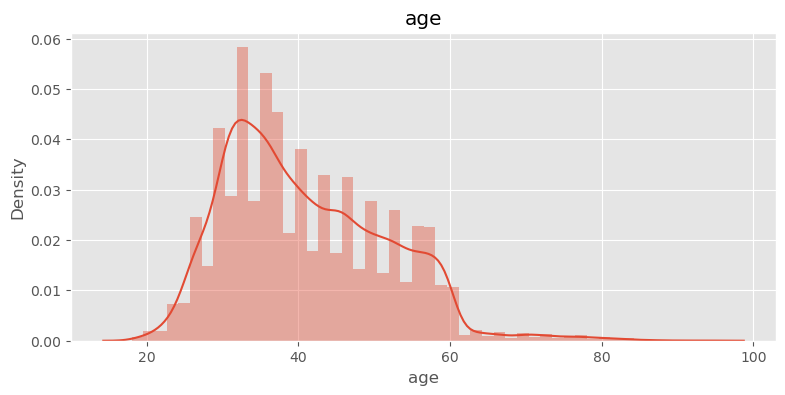

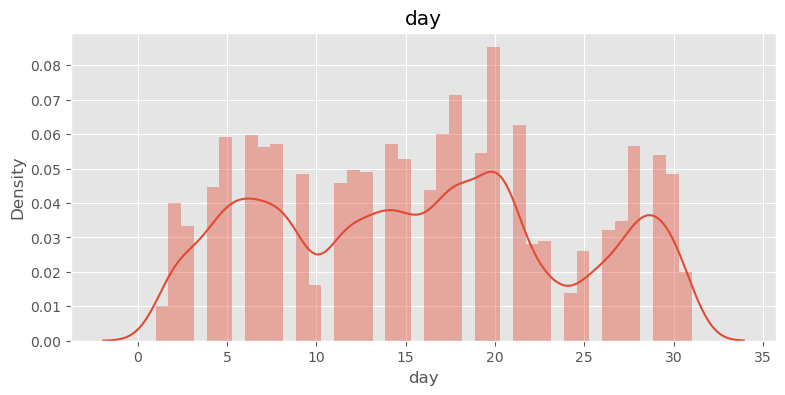

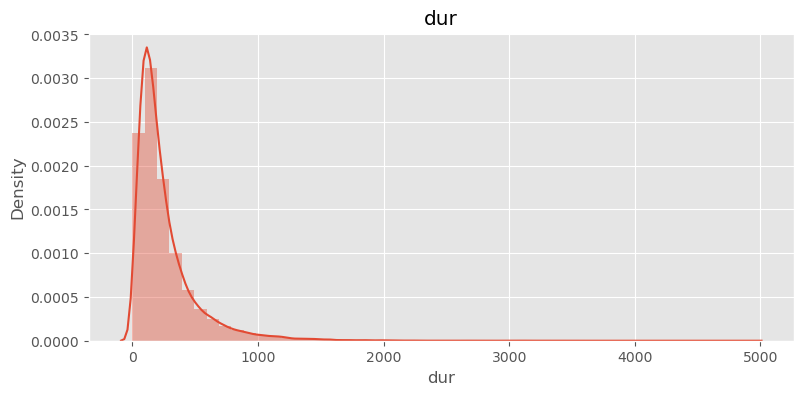

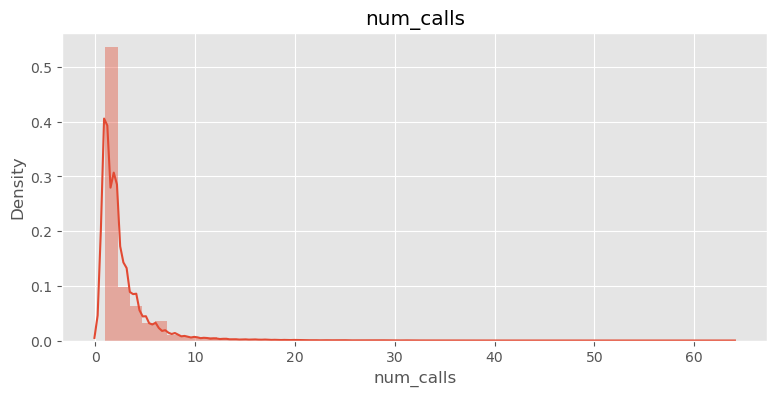

In [14]:
# plotting histogram for each numerical variable
plt.style.use("ggplot")
for column in ["age", "day", "dur",'num_calls']:
    plt.figure(figsize=(20,4))
    plt.subplot(121)
    sns.distplot(df[column], kde=True)
    plt.title(column)
     

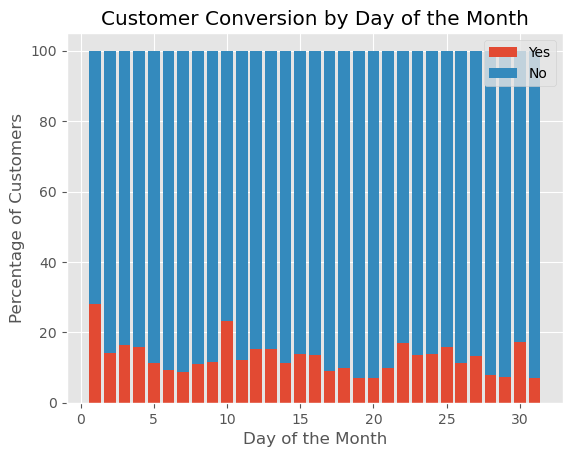

In [15]:
day_counts = df.groupby('day')['y'].value_counts(normalize=True) * 100
yes_counts = day_counts[:, 'yes']
no_counts = day_counts[:, 'no']

plt.bar(day_counts.index.levels[0], yes_counts, label='Yes')
plt.bar(day_counts.index.levels[0], no_counts, bottom=yes_counts, label='No')
plt.xlabel('Day of the Month')
plt.ylabel('Percentage of Customers')
plt.title('Customer Conversion by Day of the Month')
plt.legend()
plt.show()

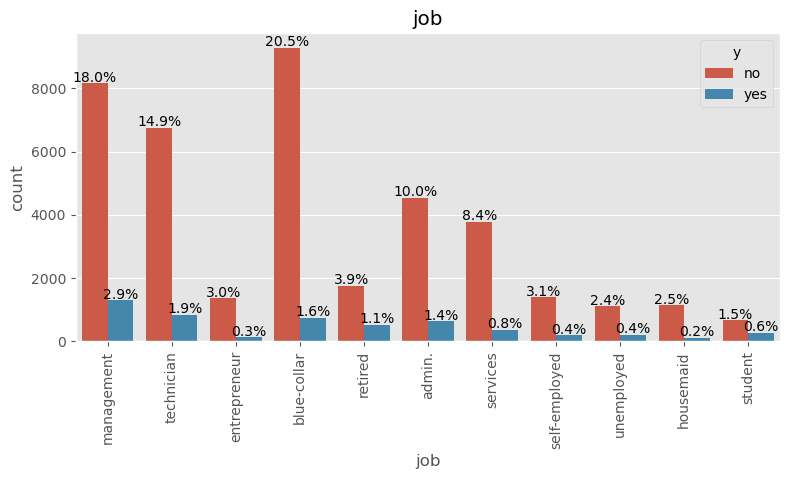

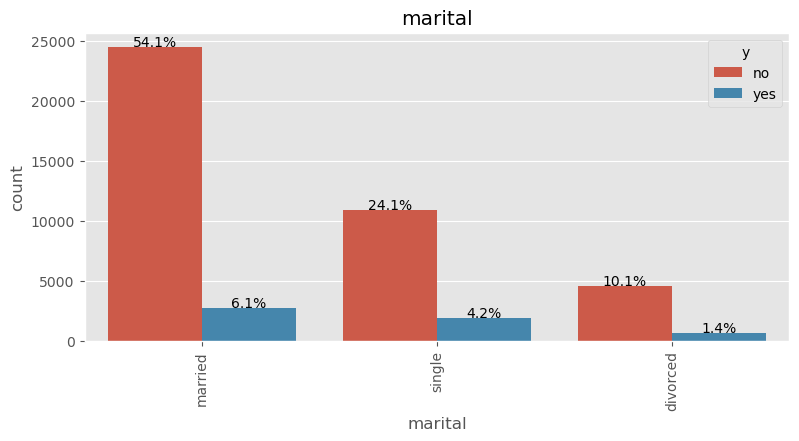

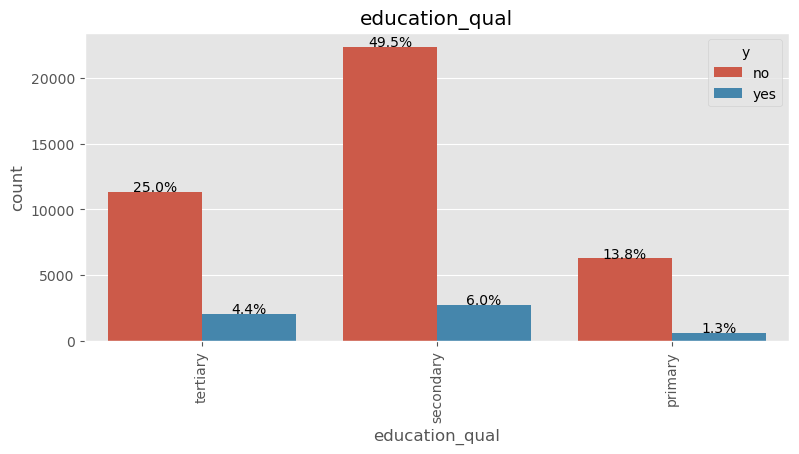

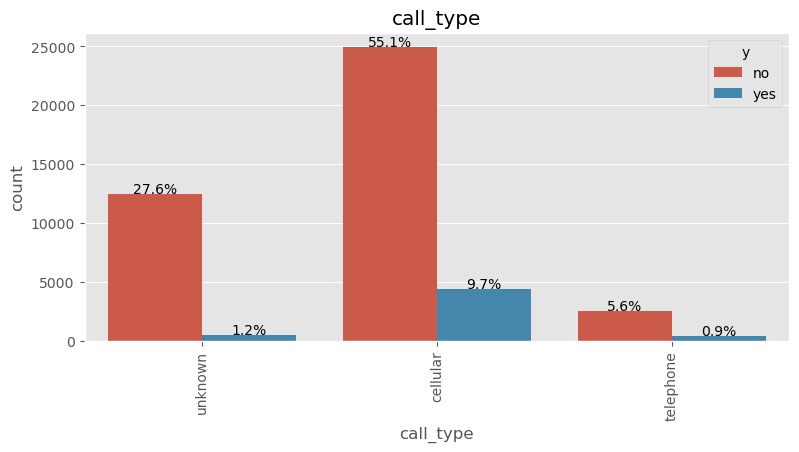

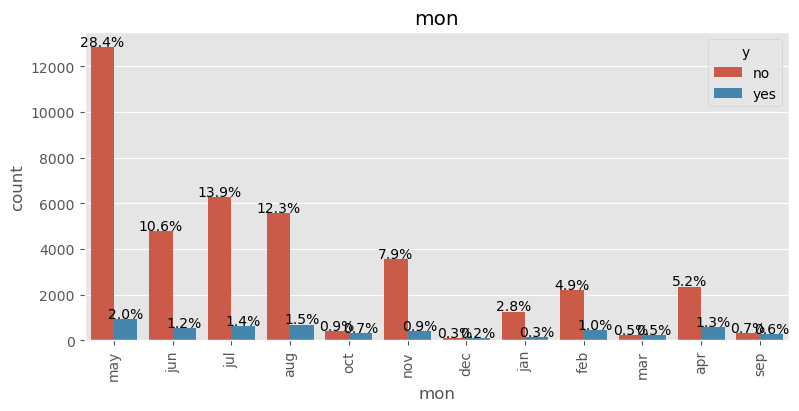

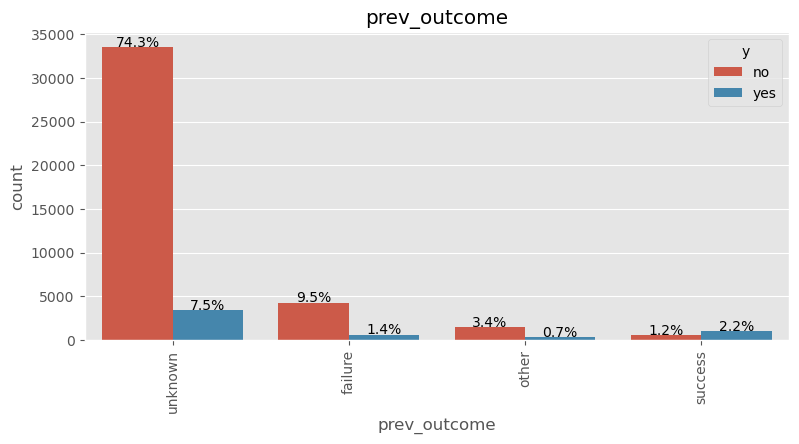

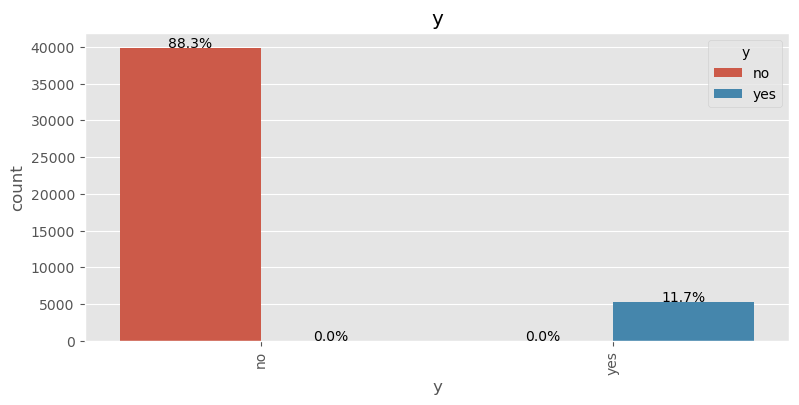

In [16]:
plt.style.use("ggplot")

for column in cat_var:
    plt.figure(figsize=(20,4))
    ax = plt.subplot(121)
    sns.countplot(x=column, hue="y", data=df)
    plt.title(column)    
    plt.xticks(rotation=90)
    
    # Add percentage labels to the top of each bar
    for p in ax.patches:
        height = p.get_height()
        total = sum([p.get_height() for p in ax.patches if p.get_x() == p.get_x()])
        ax.text(p.get_x()+p.get_width()/2., height+50, f"{height/total*100:.1f}%", ha="center")
        
    plt.show()

In [17]:
df.describe()

,age,day,dur,num_calls
count,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,15.806419,258.163080,2.763841
std,10.618762,8.322476,257.527812,3.098021
min,18.000000,1.000000,0.000000,1.000000
25%,33.000000,8.000000,103.000000,1.000000
50%,39.000000,16.000000,180.000000,2.000000
75%,48.000000,21.000000,319.000000,3.000000
max,95.000000,31.000000,4918.000000,63.000000


In [18]:
# compute interquantile range to calculate the boundaries
lower_boundries= []
upper_boundries= []
for i in ["age", "dur", "day","num_calls"]:
    IQR= df[i].quantile(0.75) - df[i].quantile(0.25)
    lower_bound= df[i].quantile(0.25) - (1.5*IQR)
    upper_bound= df[i].quantile(0.75) + (1.5*IQR)
    
    print(i, ":", lower_bound, ",",  upper_bound)
    
    lower_boundries.append(lower_bound)
    upper_boundries.append(upper_bound)

age : 10.5 , 70.5
dur : -221.0 , 643.0
day : -11.5 , 40.5
num_calls : -2.0 , 6.0


In [19]:
# replace the all the outliers which is greater then upper boundary by upper boundary
j = 0
for i in ["age", "dur", "day","num_calls"]:
    df.loc[df[i] > upper_boundries[j], i] = int(upper_boundries[j])
    j = j + 1  

In [20]:
df.describe()

,age,day,dur,num_calls
count,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.862799,15.806419,234.939307,2.392228
std,10.379659,8.322476,176.749932,1.600111
min,18.000000,1.000000,0.000000,1.000000
25%,33.000000,8.000000,103.000000,1.000000
50%,39.000000,16.000000,180.000000,2.000000
75%,48.000000,21.000000,319.000000,3.000000
max,70.000000,31.000000,643.000000,6.000000


In [21]:
df.replace({'y' : { 'yes' : 1, 'no' : 0}},inplace=True)

<Axes: >

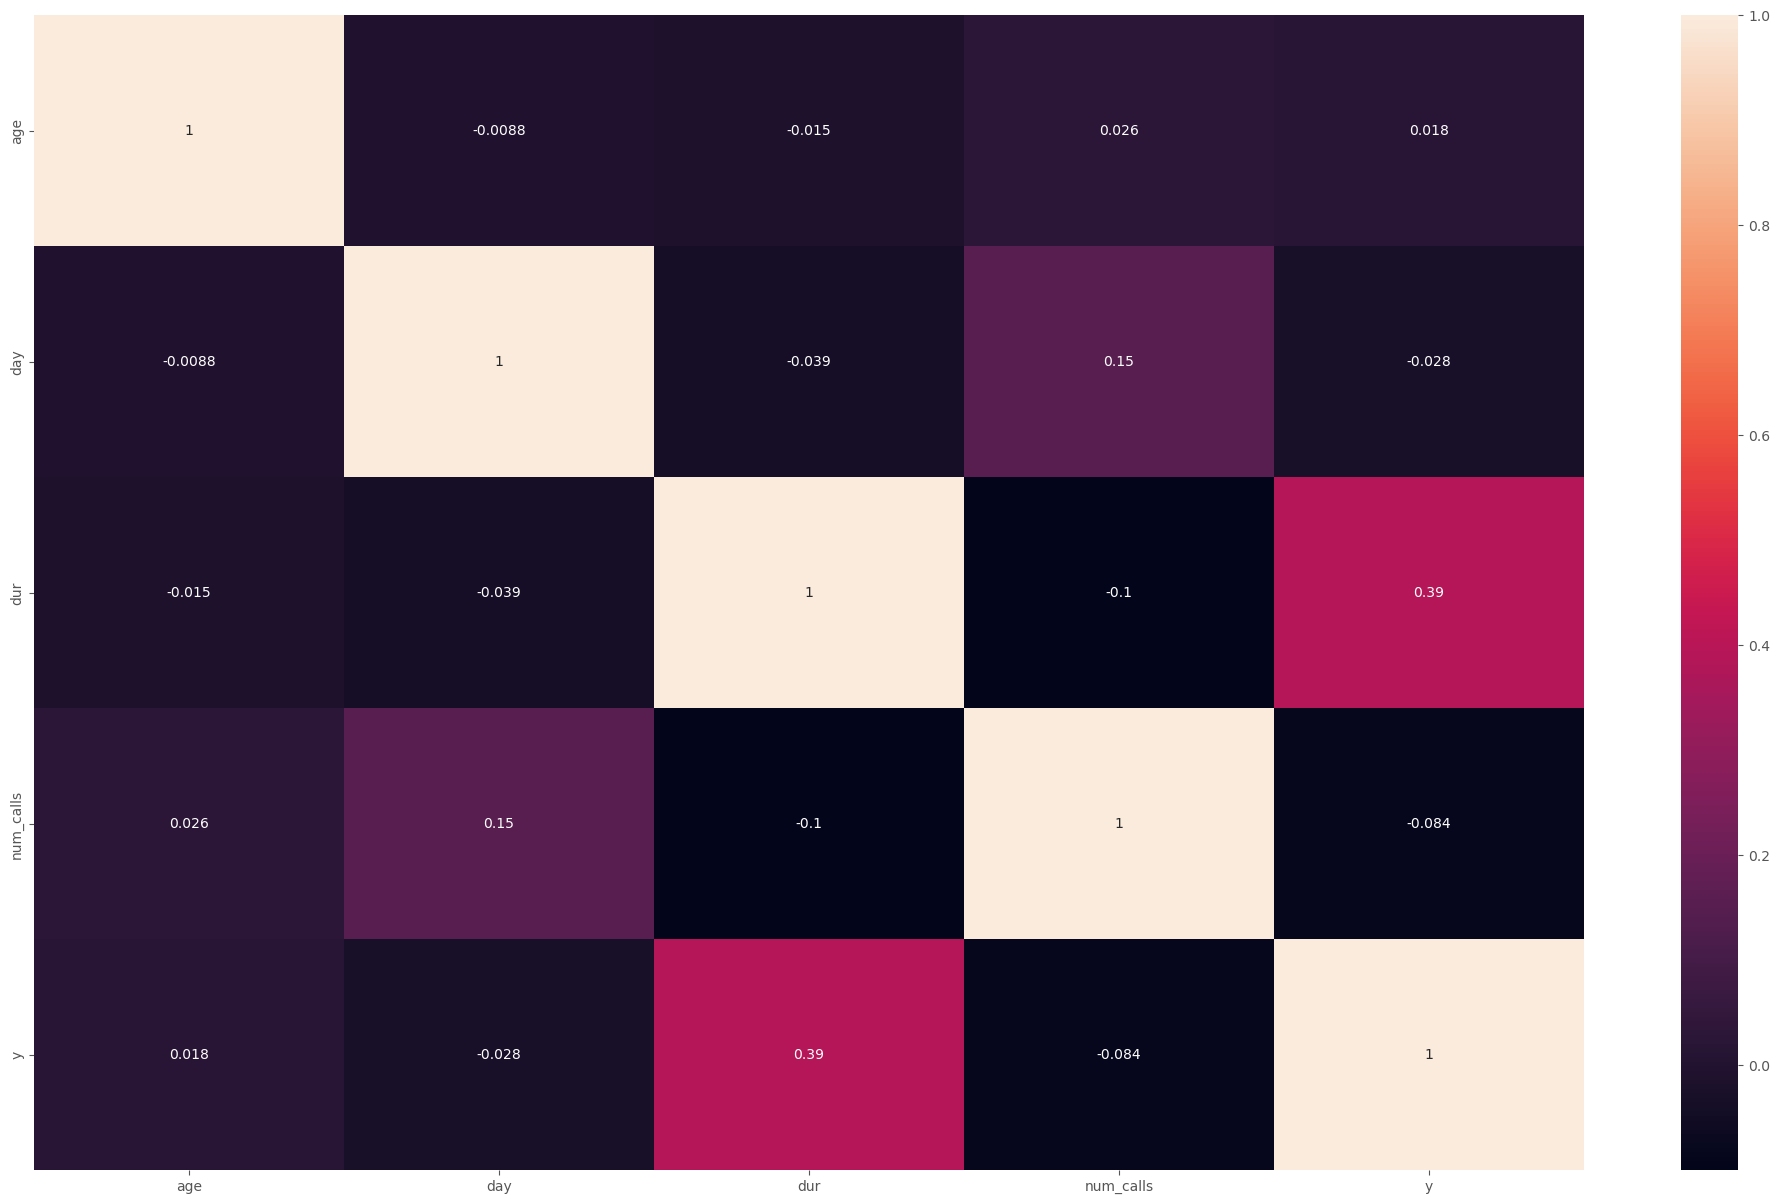

In [22]:
numeric_columns = df.select_dtypes(include=['number'])  # Select only numeric columns
plt.figure(figsize=(25,15))
sns.heatmap(numeric_columns.corr(), annot=True)

In [23]:
cat_var= df.select_dtypes(include= ["object"]).columns
print(cat_var)

Index(['job', 'marital', 'education_qual', 'call_type', 'mon', 'prev_outcome'], dtype='object')


In [24]:
for i in cat_var:
    print(i, ":", df[i].unique())

job : ['management' 'technician' 'entrepreneur' 'blue-collar' 'retired' 'admin.'
 'services' 'self-employed' 'unemployed' 'housemaid' 'student']
marital : ['married' 'single' 'divorced']
education_qual : ['tertiary' 'secondary' 'primary']
call_type : ['unknown' 'cellular' 'telephone']
mon : ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
prev_outcome : ['unknown' 'failure' 'other' 'success']


In [25]:
def encoding_data(df,col):
  for i in col:
     df_dummies = pd.get_dummies(df[i], prefix=i)
     df = pd.concat([df, df_dummies], axis=1)
     df.drop([i],inplace=True,axis=1)
  return df

In [26]:
columns=['call_type','prev_outcome','marital','job']
df=encoding_data(df,columns)

In [27]:
#Months column
months = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']

df['mon'] = df['mon'].apply(
    lambda x: months.index(x)+1
)

In [28]:
#'education_qual'
df.replace({'education_qual' : { 'tertiary' : 1, 'secondary' : 2, 'primary' : 3 }},inplace=True)

In [29]:
p= df.drop(['y'],axis=1)
q= df['y']

In [30]:
X_train, X_test, y_train, y_test = train_test_split(p, q, test_size=0.33, random_state=42)

In [31]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [32]:
lr_model = LogisticRegression(max_iter=100)
lr_model.fit(X_train, y_train)
predicted=lr_model.predict(X_test)
conf = confusion_matrix(y_test, predicted)

print()
print()
print ("The accuracy of Logistic Regression is : ", accuracy_score(y_test, predicted)*100, "%")
print ("The aurroc_auc_score of Logistic Regression is : ", roc_auc_score(y_test, lr_model.predict_proba(X_test)[:, 1]))
log_reg_y_pred_prob = lr_model.predict_proba(X_test)[:, 1]
log_reg_auc = roc_auc_score(y_test, log_reg_y_pred_prob)



The accuracy of Logistic Regression is :  89.52412868632707 %
The aurroc_auc_score of Logistic Regression is :  0.8810996340860032


In [33]:
rf_model = RandomForestClassifier(n_estimators = 100, random_state = 0)  
rf_model.fit(X_train, y_train)  
predicted = rf_model.predict(X_test)
print("The accuracy of Random Forest is : ", accuracy_score(y_test, predicted.round())*100, "%")
print ("The aurroc_auc_score of  random forest is : ", roc_auc_score(y_test, rf_model.predict_proba(X_test)[:, 1]))
dt_y_pred_prob = rf_model.predict_proba(X_test)[:, 1]
dt_fpr, dt_tpr, _ = roc_curve(y_test, dt_y_pred_prob)
dt_auc = roc_auc_score(y_test, dt_y_pred_prob)

The accuracy of Random Forest is :  90.01340482573727 %
The aurroc_auc_score of  random forest is :  0.913230493195522


In [34]:
xgb_model = xgb.XGBClassifier(use_label_encoder=False)
xgb_model.fit(X_train, y_train) 
predicted = xgb_model.predict(X_test)

print()
print ("The accuracy of X Gradient Boosting is : ", accuracy_score(y_test, predicted)*100, "%")
print ("The aurroc_auc_score of Gradient Boosting is : ", roc_auc_score(y_test, xgb_model.predict_proba(X_test)[:, 1]))
xgb_y_pred_prob = xgb_model.predict_proba(X_test)[:, 1]
xgb_auc = roc_auc_score(y_test, xgb_y_pred_prob)
     

C:\Users\SAI TARUN\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")



The accuracy of X Gradient Boosting is :  90.41554959785523 %
The aurroc_auc_score of Gradient Boosting is :  0.9274715397204265


<Axes: >

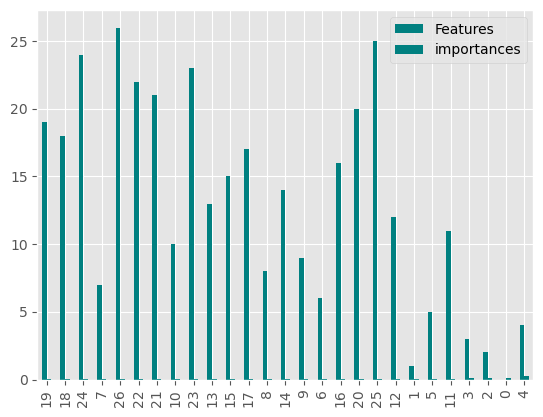

In [35]:
importances = rf_model.feature_importances_
df1 = pd.DataFrame({"Features":pd.DataFrame(X_test).columns,"importances":importances})
df1.set_index("importances")

df1 = df1.sort_values('importances')
df1.plot.bar(color='teal')

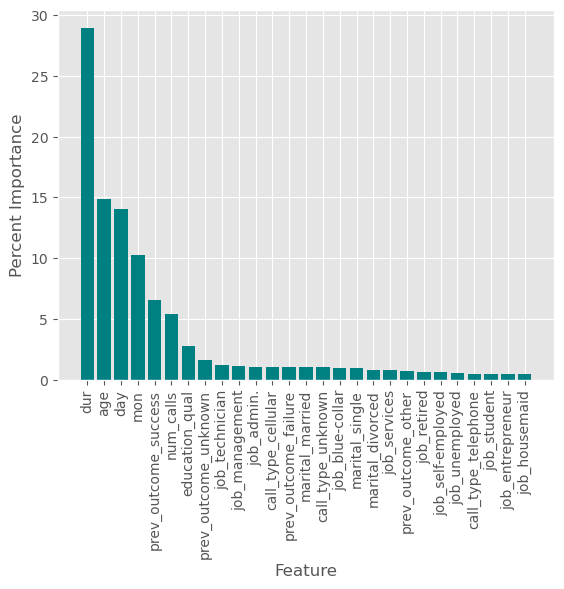

In [36]:
feature_names = list(df.columns)
if 'y' in feature_names:
    feature_names.remove('y')
total_importance = importances.sum()
percent_importances = importances / total_importance * 100

# Create a DataFrame with the feature names and their percent importances
df = pd.DataFrame({'feature_names': feature_names, 'percent_importances': percent_importances})

# Sort the DataFrame by percent importances in descending order
df = df.sort_values(by='percent_importances', ascending=False)

# Create a bar plot of the percent importances
plt.bar(x=df['feature_names'], height=df['percent_importances'], color='teal')
plt.xticks(rotation=90)
plt.xlabel('Feature')
plt.ylabel('Percent Importance')
plt.show()

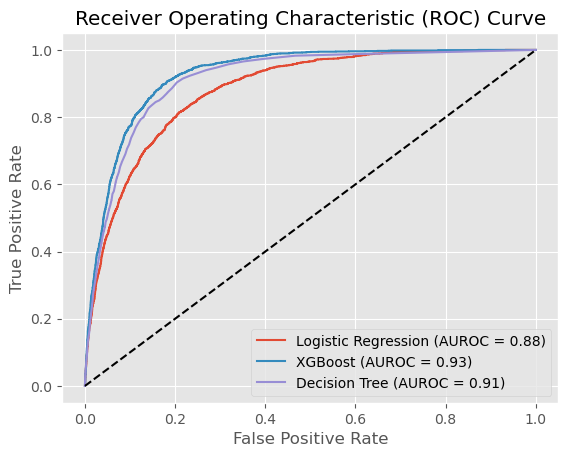

In [37]:
log_reg_fpr, log_reg_tpr, _ = roc_curve(y_test, log_reg_y_pred_prob)
xgb_fpr, xgb_tpr, _ = roc_curve(y_test, xgb_y_pred_prob)
dt_fpr, dt_tpr, _ = roc_curve(y_test, dt_y_pred_prob)

# Plot ROC curves
plt.plot(log_reg_fpr, log_reg_tpr, label=f'Logistic Regression (AUROC = {log_reg_auc:.2f})')
plt.plot(xgb_fpr, xgb_tpr, label=f'XGBoost (AUROC = {xgb_auc:.2f})')
plt.plot(dt_fpr, dt_tpr, label=f'Decision Tree (AUROC = {dt_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()